In [1]:
import quick_eq_imp
import analysis

import matplotlib.pyplot as plt
import numpy as np

In [2]:
article_theoretical_data = [4.38820638820639,11.795249795249795,15.031941031941033,16.33906633906634,16.992628992628994,17.45945945945946,17.615069615069615,17.77067977067977,17.895167895167894]

## Circuit with capacity to ground

In [ ]:
n_jct = 30
quick_eq_imp.initialize_file_mass_capa_z_eq()
y_eqs = quick_eq_imp.equivalent_impedance(n_jct=n_jct,
                                          mass_capa=True,
                                          all_eqs=False,
                                          fourier=True,
                                          loss=False,
                                          impedance=False,
                                          messages=True)

Computing additional denominators... 


100%|██████████| 13/13 [00:01<00:00,  8.69it/s]


Computing additional equivalent elements..


100%|██████████| 13/13 [00:01<00:00, 10.24it/s]


Computing additional equivalent impedance..


100%|██████████| 13/13 [00:00<00:00, 13.45it/s]


Replacing with element's values..


  0%|          | 0/1 [33:12<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
L_j0_val = 1.9*80
C_j0_val = 40e-6/80
C_g_val = 4e-8*80/n_jct

C_0_val = 1e-6

params = analysis.create_param([L_j0_val,C_j0_val,C_g_val,C_0_val])
f_s = analysis.circuit_resonances(y_eqs[0],params = params,full = False)
plt.plot([el[0] for el in f_s][:9],"o-",label=f"Real")
plt.plot([el[1] for el in f_s][:9],"o-",label=f"Imag")
plt.plot([np.sqrt(el[0]**2+el[1]**2) for el in f_s][:9],"o-",label=f"Norm")
plt.plot(article_theoretical_data,"+-",label ="Article_data")
plt.xlabel("Mode index")
plt.ylabel("Mode frequency (GHz)")
plt.legend()
plt.show()
#plt.savefig("graphs/article_fit.png")

In [10]:
fitted_params, fitted_f_s = analysis.eigenmode_fit(article_theoretical_data, y_eqs[0],[L_j0_val,C_j0_val,C_g_val,C_0_val],norm=False)
[L_j0_fit,C_j0_fit,C_g_fit,C_0_fit] = fitted_params
print(f"L_j0_fit : {L_j0_fit} || L_j0_val : {L_j0_val}")
print(f"C_j0_fit : {C_j0_fit} || C_j0_val : {C_j0_val}")
print(f"C_g_fit : {C_g_fit} || C_g_val : {C_g_val}")
print(f"C_0_fit : {C_0_fit} || C_0_val : {C_0_val}")

Fit failed
L_j0_fit : 151.99999999913217 || L_j0_val : 152.0
C_j0_fit : 4.928456260984945e-07 || C_j0_val : 5.000000000000001e-07
C_g_fit : 5.494720754179989e-08 || C_g_val : 8e-08
C_0_fit : 9.999056360847652e-07 || C_0_val : 1e-06


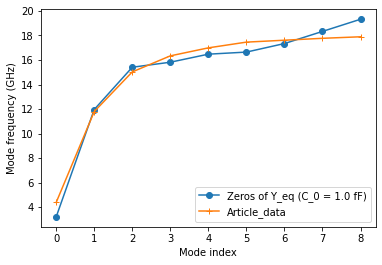

In [11]:
plt.plot([np.sqrt(el[0]**2+el[1]**2) for el in fitted_f_s][:9],"o-",label=f"Zeros of Y_eq (C_0 = {round(C_0_fit*1e6,2)} fF)")
plt.plot(article_theoretical_data,"+-",label ="Article_data")
plt.xlabel("Mode index")
plt.ylabel("Mode frequency (GHz)")
plt.legend()
plt.show()

## Circuit with capacity to pads

In [21]:
n_jct = 40
y_eqs = quick_eq_imp.equivalent_impedance(n_jct = n_jct,
                                          mass_capa = False,
                                          all_eqs = False,
                                          fourier = True,
                                          loss = False,
                                          impedance = False,
                                          messages = True)

Replacing with element's values..


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.64s/it]


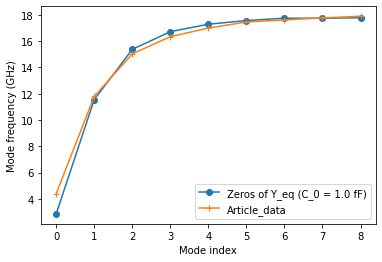

In [7]:
L_j0_val = 1.9*80
C_j0_val = 40e-6/80
C_g_val = 4e-8*80/n_jct/2

C_0_val = 1e-6
params = analysis.create_param([L_j0_val,C_j0_val,C_g_val,C_0_val])
f_s = analysis.circuit_resonances(y_eqs[0],params = params,full = False)
plt.plot([el[0] for el in f_s][:9],"o-",label=f"Zeros of Y_eq (C_0 = {round(C_0_val*1e6,2)} fF)")
plt.plot(article_theoretical_data,"+-",label ="Article_data")
plt.xlabel("Mode index")
plt.ylabel("Mode frequency (GHz)")
plt.legend()
plt.show()
#plt.savefig("graphs/article_fit.png")

In [24]:
fitted_params, fitted_f_s = analysis.eigenmode_fit(article_theoretical_data, y_eqs[0],[L_j0_val,C_j0_val,C_g_val,C_0_val])
[L_j0_fit,C_j0_fit,C_g_fit,C_0_fit] = fitted_params
print(f"L_j0_fit : {L_j0_fit} || L_j0_val : {L_j0_val}")
print(f"C_j0_fit : {C_j0_fit} || C_j0_val : {C_j0_val}")
print(f"C_g_fit : {C_g_fit} || C_g_val : {C_g_val}")
print(f"C_0_fit : {C_0_fit} || C_0_val : {C_0_val}")

Fit failed
L_j0_fit : 151.99999999669978 || L_j0_val : 152.0
C_j0_fit : 5.018505835899004e-07 || C_j0_val : 5.000000000000001e-07
C_g_fit : 7.520518049324026e-08 || C_g_val : 8e-08
C_0_fit : 9.913624195586365e-07 || C_0_val : 1e-06


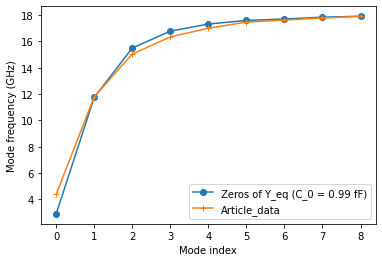

In [25]:
plt.plot([el[0] for el in fitted_f_s][:9],"o-",label=f"Zeros of Y_eq (C_0 = {round(C_0_fit*1e6,2)} fF)")
plt.plot(article_theoretical_data,"+-",label ="Article_data")
plt.xlabel("Mode index")
plt.ylabel("Mode frequency (GHz)")
plt.legend()
plt.show()